<a href="https://colab.research.google.com/github/Ansebi/sktime_Prophet_test/blob/main/20221212_Prophet_with_sktime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sktime --upgrade --quiet

#Airlines Example

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzz10wc6_/svvxqz09.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzz10wc6_/m4znoqs8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14693', 'data', 'file=/tmp/tmpzz10wc6_/svvxqz09.json', 'init=/tmp/tmpzz10wc6_/m4znoqs8.json', 'output', 'file=/tmp/tmpzz10wc6_/prophet_modelekokul00/prophet_model-20221212063029.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:30:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:30:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


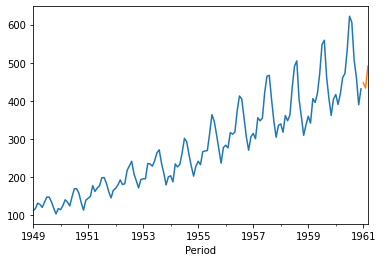

In [6]:
from sktime.datasets import load_airline
from sktime.forecasting.fbprophet import Prophet
# Prophet requires to have data with a pandas.DatetimeIndex
y = load_airline().to_timestamp(freq='M')
forecaster = Prophet(  
    seasonality_mode='multiplicative',
    n_changepoints=int(len(y) / 12),
    add_country_holidays={'country_name': 'Germany'},
    yearly_seasonality=True)
forecaster.fit(y)  
Prophet(...)
y_pred = forecaster.predict(fh=[1,2,3])
y.plot()
y_pred.plot()

In [13]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sktime.forecasting.fbprophet import Prophet

In [46]:
FIGSIZE = (20, 3)
HORIZON = 5000

## Generate $sin(x)$-based time series

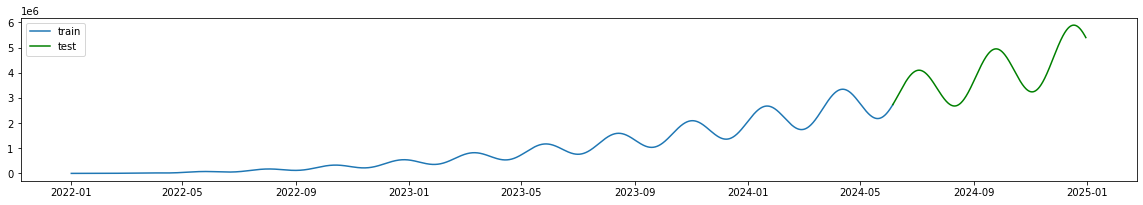

In [49]:
n_years = 3
alpha = 1/6
beta = 0.9
amplitude = 1
elevation_power = 2.2
amplitude_change_power = 2
period_starts = pd.Timestamp('2022-01-01')
train_fraction = 0.8
reduction_factor = 50

duration_days = 365*n_years
period_ends = period_starts + pd.Timedelta(days=duration_days)

x = np.linspace(1, duration_days, duration_days*24)
y = x**elevation_power
y += amplitude*x**amplitude_change_power*np.sin(x**beta*alpha)
x_date = pd.date_range(period_starts, period_ends, freq='H')[:-1]

ts = pd.Series(y, index=x_date)
train_size = len(ts) - HORIZON
ts_train = ts[:train_size]
ts_test = ts[train_size:]
ts_reduced = pd.Series(y[::reduction_factor], index=x_date[::reduction_factor])
reduced_train_size = int(len(ts_reduced)*train_fraction)
ts_train_reduced = ts_reduced[:reduced_train_size]
ts_test_reduced = ts_reduced[reduced_train_size:]

plt.figure(figsize=FIGSIZE)
#plt.scatter(x=x_date, y=y)
plt.plot(ts_train, label='train')
plt.plot(ts_test, label='test', color='green')
plt.legend()
plt.show()

In [65]:
prophet = Prophet(  
    seasonality_mode='multiplicative',
    yearly_seasonality=True)

In [66]:
%%time
prophet.fit(ts_train_reduced)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzz10wc6_/kxw68cnp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzz10wc6_/y6nnync4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82433', 'data', 'file=/tmp/tmpzz10wc6_/kxw68cnp.json', 'init=/tmp/tmpzz10wc6_/y6nnync4.json', 'output', 'file=/tmp/tmpzz10wc6_/prophet_model83ipnun8/prophet_model-20221212073128.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:31:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:31:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


CPU times: user 117 ms, sys: 32.5 ms, total: 149 ms
Wall time: 305 ms


Prophet(seasonality_mode='multiplicative', yearly_seasonality=True)

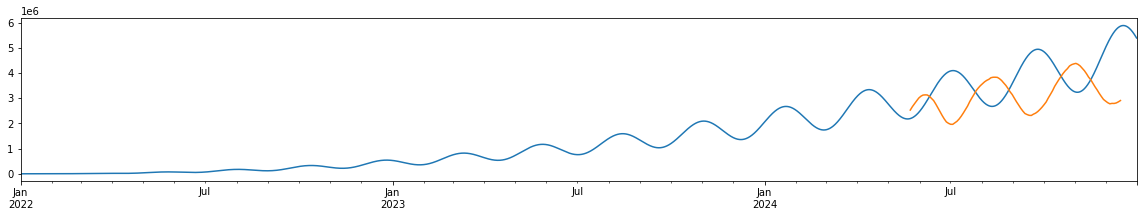

In [67]:
y_pred = prophet.predict(np.arange(HORIZON//reduction_factor))
plt.figure(figsize=FIGSIZE)
ts.plot()
y_pred.plot()


Conclusion: the Prophet model produced the result out of phase,
but there are many opportunities for tweaking, which I would do on the actual data.